# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [3]:
# Read your api key environment variable
load_dotenv()
newsapi_key = os.getenv('NEWSAPI_KEY')

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=newsapi_key)

from pynytimes import NYTAPI
nyt = NYTAPI(os.getenv('NYT_KEY'))

In [10]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q='bitcoin', language='en', sort_by='relevancy', page = 1, page_size = 100
)

In [19]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q='ethereum', language='en', sort_by='relevancy', page = 1, page_size = 100
)

In [157]:
# Create the Bitcoin sentiment scores DataFrame
# Dedupe and remove articles with content = None
valid_bitcoin_articles = list(set([article['content'] for article in bitcoin_articles['articles'] if article['content'] != None]))
bitcoin_scores = [analyzer.polarity_scores(article) for article in valid_bitcoin_articles]
bitcoin_df = pd.DataFrame(
    data={
        'Compound': [score['compound'] for score in bitcoin_scores],
        'Negative': [score['neg'] for score in bitcoin_scores],
        'Neutral': [score['neu'] for score in bitcoin_scores],
        'Positive': [score['pos'] for score in bitcoin_scores],
        'text': valid_bitcoin_articles
    }
)
bitcoin_df.head()

Compound  Negative  Neutral  Positive  \
0    0.7506     0.000    0.802     0.198   
1   -0.5272     0.089    0.882     0.029   
2   -0.2677     0.074    0.881     0.045   
3    0.3818     0.000    0.933     0.067   
4    0.3400     0.000    0.930     0.070   

                                                text  
0  FTX, a cryptocurrency exchange that offers der...  
1  Isolation.site does just one thing: it visits ...  
2  An outspoken Bitcoin whale who rarely shows af...  
3  ...The canton, which bills itself as home to "...  
4  Gold and oil have historically been reliable s...

In [158]:
# Create the ethereum sentiment scores DataFrame
# Dedupe and remove articles with content = None
valid_ethereum_articles = list(set([article['content'] for article in ethereum_articles['articles'] if article['content'] != None]))
ethereum_scores = [analyzer.polarity_scores(article) for article in valid_ethereum_articles]
ethereum_df = pd.DataFrame(
    data={
        'Compound': [score['compound'] for score in ethereum_scores],
        'Negative': [score['neg'] for score in ethereum_scores],
        'Neutral': [score['neu'] for score in ethereum_scores],
        'Positive': [score['pos'] for score in ethereum_scores],
        'text': valid_ethereum_articles
    }
)
ethereum_df.head()

Compound  Negative  Neutral  Positive  \
0    0.4019       0.0    0.924     0.076   
1    0.6369       0.0    0.843     0.157   
2    0.1779       0.0    0.952     0.048   
3    0.6486       0.0    0.836     0.164   
4    0.0644       0.0    0.965     0.035   

                                                text  
0  An Ethereum smart contract feature that offers...  
1  Swisscom Blockchain, a distributed ledger tech...  
2  The native token for OMG Network has more than...  
3  The Takeaway\r\n<ul><li>Under development by t...  
4  Uniswaps governance token, UNI, which was laun...

In [159]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

Compound   Negative    Neutral   Positive
count  90.000000  90.000000  90.000000  90.000000
mean    0.158027   0.044111   0.876511   0.079367
std     0.475237   0.070495   0.086926   0.067808
min    -0.865800   0.000000   0.588000   0.000000
25%     0.000000   0.000000   0.810000   0.007000
50%     0.272300   0.000000   0.908000   0.088000
75%     0.507000   0.087250   0.915000   0.108500
max     0.923100   0.294000   1.000000   0.326000

In [160]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

Compound   Negative    Neutral   Positive
count  95.000000  95.000000  95.000000  95.000000
mean    0.141825   0.035442   0.895000   0.069547
std     0.402940   0.066063   0.086984   0.068289
min    -0.910000   0.000000   0.607000   0.000000
25%     0.000000   0.000000   0.842000   0.000000
50%     0.177900   0.000000   0.909000   0.068000
75%     0.411700   0.063000   0.956500   0.103500
max     0.851900   0.347000   1.000000   0.311000

### Questions:

Q: Which coin had the highest mean positive score?

In [161]:
print(f"A: {'Bitcoin' if bitcoin_df.Positive.mean() > ethereum_df.Positive.mean() else 'Ethereum'} @ {max(bitcoin_df.Positive.mean(),ethereum_df.Positive.mean())}")

A: Bitcoin @ 0.07936666666666664


Q: Which coin had the highest compound score?

In [162]:
print(f"A: {'Bitcoin' if bitcoin_df.Compound.mean() > ethereum_df.Compound.mean() else 'Ethereum'} @ {max(bitcoin_df.Compound.mean(),ethereum_df.Compound.mean())}")

A: Bitcoin @ 0.15802666666666662


Q. Which coin had the highest positive score?

In [163]:
print(f"A: {'Bitcoin' if bitcoin_df.Positive.max() > ethereum_df.Positive.max() else 'Ethereum'} @ {max(bitcoin_df.Positive.max(),ethereum_df.Positive.max())}")

A: Bitcoin @ 0.326


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [164]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [165]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

In [166]:
# Complete the tokenizer function
def tokenizer(text):
    '''Tokenizes text.'''
    
    # Create a list of the words
    text_list = text.split(' ')

    # Convert the words to lowercase
    text_list = [text.lower() for text in text_list]
    
    # Remove the stop words
    text_list = [text for text in text_list if text not in sw]
    
    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    text_list = [regex.sub('', text) for text in text_list]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(text) for text in text_list if text != '']
    
    return tokens


In [167]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(
    lambda x: tokenizer(x)
)
bitcoin_df.head()

Compound  Negative  Neutral  Positive  \
0    0.7506     0.000    0.802     0.198   
1   -0.5272     0.089    0.882     0.029   
2   -0.2677     0.074    0.881     0.045   
3    0.3818     0.000    0.933     0.067   
4    0.3400     0.000    0.930     0.070   

                                                text  \
0  FTX, a cryptocurrency exchange that offers der...   
1  Isolation.site does just one thing: it visits ...   
2  An outspoken Bitcoin whale who rarely shows af...   
3  ...The canton, which bills itself as home to "...   
4  Gold and oil have historically been reliable s...   

                                              tokens  
0  [ftx, cryptocurrency, exchange, offer, derivat...  
1  [isolationsite, one, thing, visit, url, want, ...  
2  [outspoken, bitcoin, whale, rarely, show, affe...  
3  [the, canton, bill, home, crypto, valley, said...  
4  [gold, oil, historically, reliable, store, val...

In [168]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(
    lambda x: tokenizer(x)
)
ethereum_df.head()

Compound  Negative  Neutral  Positive  \
0    0.4019       0.0    0.924     0.076   
1    0.6369       0.0    0.843     0.157   
2    0.1779       0.0    0.952     0.048   
3    0.6486       0.0    0.836     0.164   
4    0.0644       0.0    0.965     0.035   

                                                text  \
0  An Ethereum smart contract feature that offers...   
1  Swisscom Blockchain, a distributed ledger tech...   
2  The native token for OMG Network has more than...   
3  The Takeaway\r\n<ul><li>Under development by t...   
4  Uniswaps governance token, UNI, which was laun...   

                                              tokens  
0  [ethereum, smart, contract, feature, offer, re...  
1  [swisscom, blockchain, distributed, ledger, te...  
2  [native, token, omg, network, doubled, past, w...  
3  [takeawayulliunder, development, lnpbp, standa...  
4  [uniswaps, governance, token, uni, launched, w...

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [169]:
from collections import Counter
from nltk import ngrams

In [170]:
# Generate the Bitcoin N-grams where N=2
Counter(ngrams(bitcoin_df.tokens.sum(), n=2)).most_common(20)

[(('satoshi', 'nakaboto'), 40),
 (('char', 'robot'), 20),
 (('robot', 'colleague'), 20),
 (('colleague', 'satoshi'), 20),
 (('nakaboto', 'writes'), 20),
 (('writes', 'bitcoin'), 20),
 (('every', 'fucking'), 20),
 (('fucking', 'daywelcome'), 20),
 (('daywelcome', 'another'), 20),
 (('another', 'edition'), 20),
 (('edition', 'bitcoin'), 20),
 (('bitcoin', 'today'), 20),
 (('today', 'i'), 20),
 (('i', 'satoshi'), 20),
 (('nakaboto', 'tell'), 20),
 (('tell', 'whats'), 20),
 (('whats', 'going'), 20),
 (('going', 'bitcoin'), 20),
 (('bitcoin', 'char'), 20),
 (('bitcoin', 'btc'), 17)]

In [171]:
# Generate the Ethereum N-grams where N=2
Counter(ngrams(ethereum_df.tokens.sum(), n=2)).most_common(20)

[(('decentralized', 'finance'), 10),
 (('char', 'ethereum'), 10),
 (('finance', 'defi'), 8),
 (('ethereum', 'classic'), 6),
 (('char', 'bitcoin'), 6),
 (('ethereum', 'blockchain'), 6),
 (('t', 'char'), 5),
 (('around', 'utc'), 5),
 (('ethereum', 'miner'), 5),
 (('smart', 'contract'), 4),
 (('btc', 'trading'), 4),
 (('trading', 'around'), 4),
 (('utc', 'pm'), 4),
 (('pm', 'et'), 4),
 (('ether', 'char'), 4),
 (('th', 'char'), 3),
 (('omg', 'network'), 3),
 (('went', 'live'), 3),
 (('critical', 'bug'), 3),
 (('bug', 'left'), 3)]

In [172]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    '''Returns the top N tokens from the frequency count'''
    return Counter(tokens).most_common(N)

In [173]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_df.tokens.sum())

[('char', 90),
 ('bitcoin', 90),
 ('satoshi', 40),
 ('nakaboto', 40),
 ('every', 22),
 ('i', 22),
 ('going', 22),
 ('another', 21),
 ('edition', 21),
 ('robot', 20)]

In [174]:
# Get the top 10 words for Ethereum
token_count(ethereum_df.tokens.sum())

[('char', 95),
 ('ethereum', 63),
 ('bitcoin', 22),
 ('blockchain', 20),
 ('cryptocurrency', 15),
 ('decentralized', 15),
 ('defi', 15),
 ('network', 14),
 ('token', 12),
 ('crypto', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

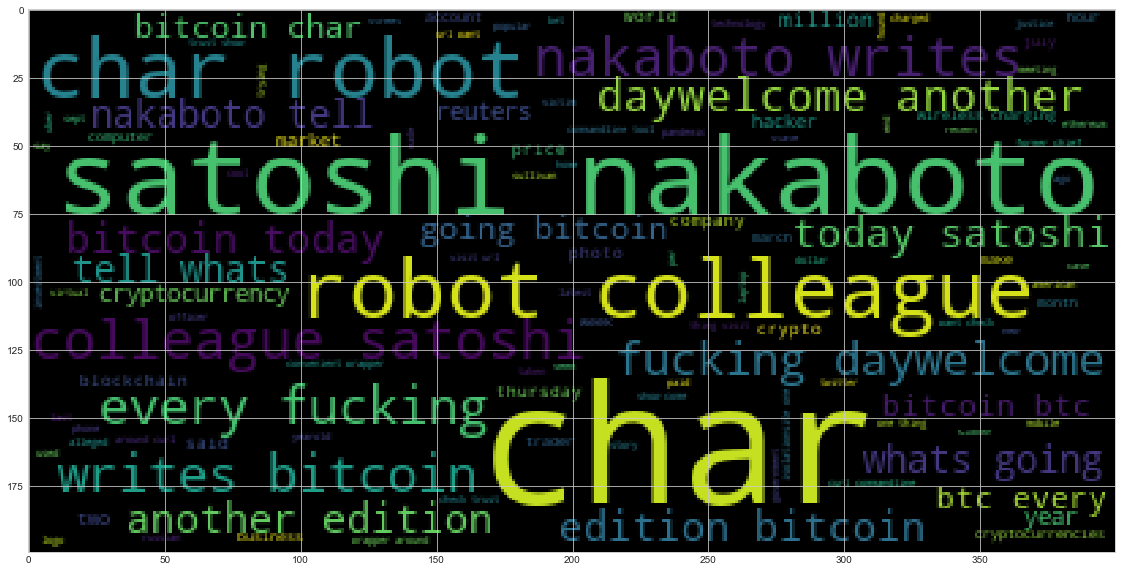

In [176]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(' '.join(bitcoin_df.tokens.sum()))
plt.label = 'Bitcoin Word Cloud'
plt.imshow(bitcoin_wc)

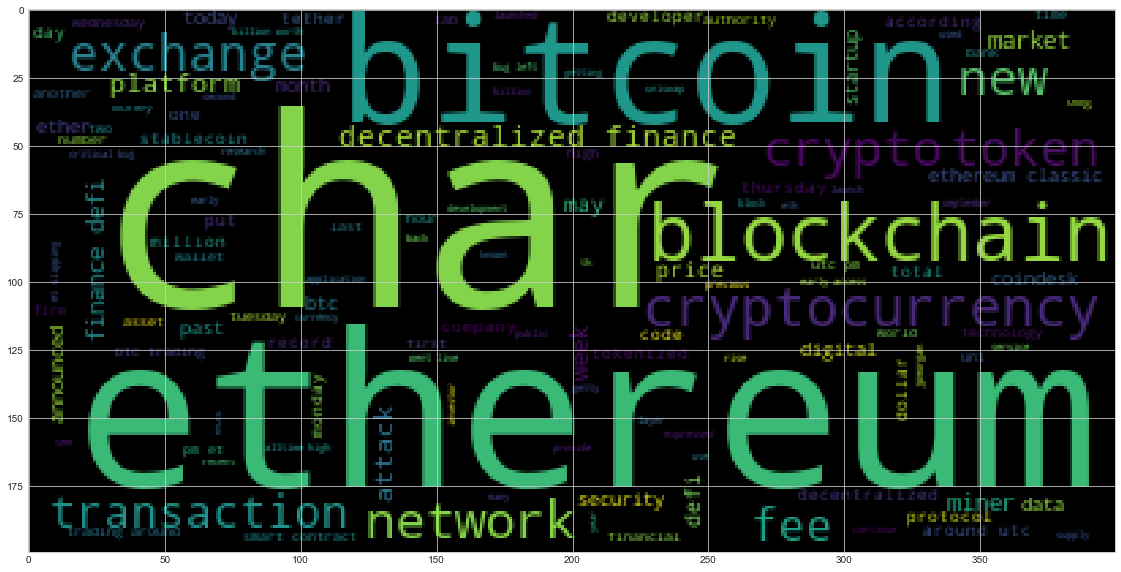

In [177]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(' '.join(ethereum_df.tokens.sum()))
plt.imshow(ethereum_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [178]:
import spacy
from spacy import displacy

In [72]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [179]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [180]:
# Concatenate all of the bitcoin text together
bitcoin_texts = ' '.join(bitcoin_df.text.to_list())
bitcoin_texts

'FTX, a cryptocurrency exchange that offers derivatives, options and other sophisticated products, is acquiring a popular portfolio tracking app, Blockfolio.\r\nFTX is spending $150 million for the acqu… [+1325 chars] Isolation.site does just one thing: it visits URLs that you want to check out but don\'t trust, and shows you what comes up. It\'s not just a convenient wrapper around the curl command-line tool, but g… [+1726 chars] An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymous trader known as Joe007 says UNUS SED LEO (LEO) may be a soli… [+1503 chars] ...The canton, which bills itself as home to "Crypto Valley," said it would accept taxes from companies or individuals of up to 100,000 Swiss francs (about $110,000) paid in Bitcoin or Ether as of Fe… [+242 chars] Gold and oil have historically been reliable stores of value. Because they are scarce commodities, they make dependable hedges to the 

In [181]:
# Run the NER processor on all of the text
bitcoin_nlp = nlp(bitcoin_texts)

# Add a title to the document
bitcoin_nlp.user_data['title'] = 'Bitcoin NER'

In [182]:
# Render the visualization
displacy.render(bitcoin_nlp, style='ent')

In [188]:
# List all Entities
for entity in list(set(bitcoin_nlp.ents)):
    print(f'{entity.text} {entity.label_}')

100,000 MONEY
Depa PERSON
five years ago DATE
Reuters ORG
Fidelity Investments ORG
US GPE
Bitcoin GPE
LONDON GPE
NEW YORK CITY GPE
Abolaji Odunjo ORG
Satoshi Nakaboto PERSON
March DATE
Bitcoin GPE
Get Forbes' PERSON
Bitcoin GPE
Bitcoin GPE
Alexis Akwagyiram PERSON
10,000 MONEY
the end of July DATE
REUTERS/Kacper Pempel/Illustration/File Photo/File Photo - Kacper Pempel/ ORG
Bitcoin GPE
Ether PERSON
Satoshi Nakaboto PERSON
Nvidia ORG
Qali WORK_OF_ART
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Russian NORP
Satoshi Nakaboto ORG
about $110,000 MONEY
Thursday DATE
seventh ORDINAL
$150 million MONEY
four CARDINAL
Uber PERSON
one CARDINAL
Today DATE
$40 billion MONEY
Ryuk ORG
two CARDINAL
two CARDINAL
US GPE
Reuters ORG
a year DATE
Bitcoin GPE
the United States District Court GPE
Sjoerd Knibbeler PERSON
just ten years DATE
one CARDINAL
Reuters ORG
two years DATE
LAGOS/LONDON ORG
March 28, 2018 DATE
Bitcoin GPE
UNUS SED LEO ORG
Bitcoin GPE
bitcoin GPE
UK GPE
REUTERS/Dado Ruvic/Illust ORG


---

## Ethereum NER

In [189]:
# Concatenate all of the Ethereum text together
ethereum_texts = ' '.join(ethereum_df.text.to_list())
ethereum_texts

'An Ethereum smart contract feature that offers rebates for fees has developers scratching their heads, wondering if they should toss the old code in light of an exponential rise in transaction costs.… [+3503 chars] Swisscom Blockchain, a distributed ledger technology startup owned by telco giant Swisscom, has been awarded a grant from the Web3 Foundation to build a cloud-based protection layer for stakers on th… [+2550 chars] The native token for OMG Network has more than doubled in the past week as record Ethereum fees lead some investors to look to layer-2 solutions.\r\n<ul><li>CoinGecko data shows OMG tokens have increas… [+1681 chars] The Takeaway\r\n<ul><li>Under development by the LNP/BP Standards Association, the RGB protocol entered beta in June.</li><li>The second layer network promises to bring smart contracts and tokenized as… [+7463 chars] Uniswaps governance token, UNI, which was launched Wednesday night, has been on a roller-coaster ride in the past 24 hours, but despite

In [190]:
# Run the NER processor on all of the text
ethereum_nlp = nlp(ethereum_texts)

# Add a title to the document
ethereum_nlp.user_data['title'] = 'Ethereum NER'

In [191]:
# Render the visualization
displacy.render(ethereum_nlp, style='ent')

In [192]:
# List all Entities
for entity in list(set(ethereum_nlp.ents)):
    print(f'{entity.text} {entity.label_}')

Uniswaps ORG
three weeks DATE
the past few months DATE
two CARDINAL
Tuesday DATE
6 min QUANTITY
18 DATE
Thursday DATE
3.1234 MONEY
the Web3 Foundation ORG
Monday DATE
LEO ORG
LTC ORG
INX Ltd. ORG
BTC ORG
0.73% PERCENT
the past 24 hours TIME
NEW YORK GPE
first ORDINAL
BTC ORG
Medalla PERSON
ul><li PERSON
Sunday DATE
Liz Steininger PERSON
4 p.m. ET TIME
Ethereum 2.0 ORG
4.8% PERCENT
developer house Snowfork ORG
DeFi ORG
Ethereum Classics ORG
Ethereum 2.0 ORG
September 1 DATE
Reuters ORG
Russian NORP
DeFi PERSON
zero CARDINAL
ul><li PERSON
3.8% PERCENT
Ethereum 2.0 ORG
AI GPE
ETH ORG
DeFi LOC
DeFi PERSON
6 min QUANTITY
Blockchai GPE
this month DATE
Fall 2020 DATE
the Ethereum Foundation ORG
less than 1,200 CARDINAL
INX ORG
years DATE
today DATE
Polkadot ORG
BTC ORG
Bitcoin GPE
First ORDINAL
May and June DATE
Arbol ORG
nearly $17 million MONEY
ConsenSys ORG
BTC ORG
Wednesday DATE
Ethereum ( ORG
1.47 MONEY
Fidelity ORG
Tether PERSON
Bloomberg News ORG
first ORDINAL
Kraken ORG
one CARDINAL
C